In [52]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

### Regression Problem

Predict gemstone price based on two features.

In [53]:
df = pd.read_csv('./data/fake_reg.csv')
df

price     feature1     feature2
0    461.527929   999.787558   999.766096
1    548.130011   998.861615  1001.042403
2    410.297162  1000.070267   998.844015
3    540.382220   999.952251  1000.440940
4    546.024553  1000.446011  1000.338531
..          ...          ...          ...
995  476.526078  1000.018988   999.672732
996  457.313186   998.855379  1000.020026
997  456.720992  1001.451646   998.847606
998  403.315576  1000.771023   998.562851
999  599.367093   999.232244  1001.451407

[1000 rows x 3 columns]

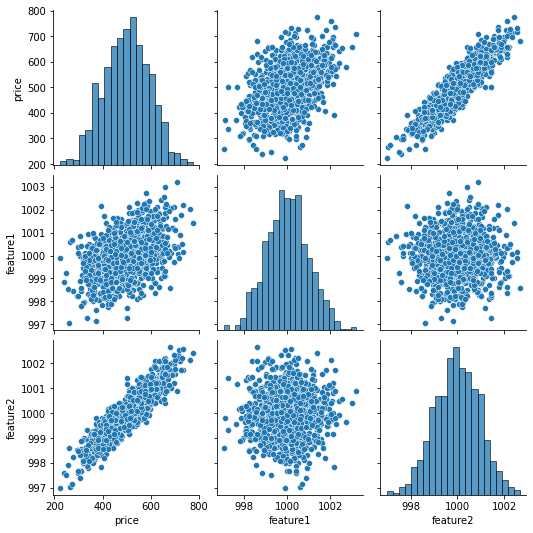

In [54]:
sns.pairplot(data=df);

### Perform the Train-test Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# features
X = df[['feature1', 'feature2']].values

# label
y = df['price'].values

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
X_train.shape

(700, 2)

In [58]:
X_test.shape

(300, 2)

### Normalize and Scale Feature Data

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
scaler.fit(X_train)

MinMaxScaler()

In [62]:
X_train = scaler.transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

### Creating and Training the Model

In [64]:
import tensorflow as tf

In [66]:
from tensorflow.keras.models import Sequential

In [67]:
from tensorflow.keras.layers import Dense, Activation

In [18]:
# help(Sequential)

In [19]:
# help(Dense)

In [68]:
# model_temp = Sequential([Dense(4, activation='relu'),
#                     Dense(2, activation='relu'),
#                     Dense(1)])

In [69]:
# preferred approach for builing a model layer by layer
model = Sequential()

# input layer??
model.add(Dense(4, activation='relu'))

# hidden layers
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# final output layer for price
model.add(Dense(1))  

# compile the model
model.compile(optimizer='rmsprop', loss='mse')

In [70]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
22/22 [==============================] - 2s 2ms/step - loss: 257534.2099
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 253826.7147
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 251265.7921
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255035.0666
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256433.2806
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256554.8641
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 254265.0258
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 256887.6793
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 254006.4626
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 255650.7677
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 256091.7554
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 3ms/step - loss: 6633.2149
Epoch 97/250
22/22 [==============================] - 0s 3ms/step - loss: 4933.9940
Epoch 98/250
22/22 [==============================] - 0s 3ms/step - loss: 3636.7470
Epoch 99/250
22/22 [==============================] - 0s 4ms/step - loss: 3026.9680
Epoch 100/250
22/22 [==============================] - 0s 4ms/step - loss: 2484.3494
Epoch 101/250
22/22 [==============================] - 0s 4ms/step - loss: 2501.1231
Epoch 102/250
22/22 [==============================] - 0s 3ms/step - loss: 2208.5322
Epoch 103/250
22/22 [==============================] - 0s 3ms/step - loss: 2289.8768
Epoch 104/250
22/22 [==============================] - 0s 3ms/step - loss: 2129.2425
Epoch 105/250
22/22 [==============================] - 0s 3ms/step - loss: 2203.5317
Epoch 106/250
22/22 [==============================] - 0s 3ms/step - loss: 2171.9690
Epoch 107/250
22/22 [==============================] - 0s 3ms/step - loss: 2079.32

22/22 [==============================] - 0s 3ms/step - loss: 99.6290
Epoch 194/250
22/22 [==============================] - 0s 3ms/step - loss: 87.8631
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 84.2684
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 77.2381
Epoch 197/250
22/22 [==============================] - 0s 4ms/step - loss: 81.5655
Epoch 198/250
22/22 [==============================] - 0s 3ms/step - loss: 70.1171
Epoch 199/250
22/22 [==============================] - 0s 4ms/step - loss: 58.1126
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 60.4526
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 52.2925
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 51.6057
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 46.9291
Epoch 204/250
22/22 [==============================] - 0s 1ms/step - loss: 42.8180
Epoch 205/250
22/2

In [71]:
loss = model.history.history['loss']

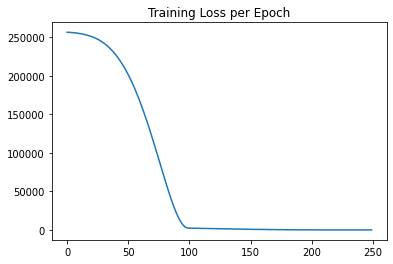

In [72]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Model Evaluation

In [74]:
model.metrics_names

['loss']

In [75]:
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)

print(train_score, test_score)

24.44851303100586 26.589982986450195


In [76]:
y_pred = model.predict(X_test)

In [77]:
df_pred = pd.DataFrame(y_test, columns=['Test Y'])

In [78]:
pred_series = pd.Series(y_pred.reshape(300,))

In [79]:
df_pred = pd.concat([df_pred, pred_series], axis=1)
df_pred.columns = ['Test Y', 'Pred Y']
df_pred

Test Y      Pred Y
0    402.296319  406.273041
1    624.156198  624.939453
2    582.455066  593.466309
3    578.588606  573.540222
4    371.224104  367.549438
..          ...         ...
295  525.704657  530.274841
296  502.909473  516.268860
297  612.727910  611.022278
298  417.569725  417.949646
299  410.538250  411.878723

[300 rows x 2 columns]

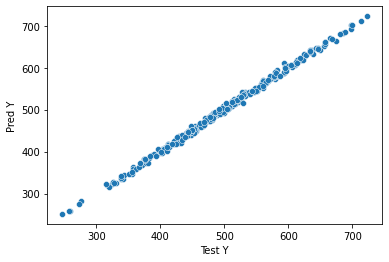

In [80]:
sns.scatterplot(x='Test Y', y='Pred Y', data=df_pred);

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mean_absolute_error(df_pred['Test Y'], df_pred['Pred Y'])

4.182335546225289

In [83]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [84]:
mean_squared_error(df_pred['Test Y'], df_pred['Pred Y'])

26.5899868828583

In [85]:
mean_squared_error(df_pred['Test Y'], df_pred['Pred Y']) ** 0.5

5.156547961849895

### Predicting on Brand New Data

In [86]:
new_gem = [[998, 1000]]

In [87]:
x = scaler.transform(new_gem)
x

array([[0.14117652, 0.53968792]])

In [88]:
model.predict(x)

array([[420.71915]], dtype=float32)

In [89]:
# save the model
from tensorflow.keras.models import load_model

In [90]:
model.save('my_gem_model.h5')

In [91]:
later_model = load_model('./my_gem_model.h5')

In [92]:
later_model.predict(x)

array([[420.71915]], dtype=float32)